# Import package library and global parameter settings

In [1]:
import os
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
import warnings
warnings.filterwarnings('ignore')

In [1]:
import xgboost as xgb 
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import KFold, train_test_split, GridSearchCV

In [3]:
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import r2_score  #R square

In [4]:
plt.rcParams['font.sans-serif'] = ['Times New Roman']
plt.rcParams['axes.unicode_minus'] = False

In [5]:
dir_open = r'D:\DoctoralThesis\CorrForScattAna'
dir_write = dir_open

# 1 Reading in parameters and setting them

In [7]:
if __name__ == '__main__':
    GDCalCDOM = pd.read_excel(os.path.join(dir_open,"CDOM(88Points)MachineLearningModelCalibration.xlsx"),index_col ='Wavelength')
    GDValCDOM = pd.read_excel(os.path.join(dir_open,"CDOM(88Points)MachineLearningModelValidation.xlsx"),index_col ='Wavelength')
    lenSelectedBandNumCDOM = len(GDCalCDOM.columns)-1
    lenCalSampPointsNumCDOM = len(GDCalCDOM.index)
    lenValSampPointsNumCDOM = len(GDValCDOM.index)
    
    cal_data_inputs_CDOM = np.array(GDCalCDOM.iloc[:,0:lenSelectedBandNumCDOM]).reshape(lenCalSampPointsNumCDOM,lenSelectedBandNumCDOM) 
    val_data_inputs_CDOM = np.array(GDValCDOM.iloc[:,0:lenSelectedBandNumCDOM]).reshape(lenValSampPointsNumCDOM,lenSelectedBandNumCDOM)
    cal_data_outputs_CDOM = np.array(GDCalCDOM['CDOM']).reshape(lenCalSampPointsNumCDOM,1)
    val_data_outputs_CDOM = np.array(GDValCDOM['CDOM']).reshape(lenValSampPointsNumCDOM,1)
        
    xgb_CDOM_params = {'learning_rate': 0.3, 'n_estimators': 50, 'max_depth': 6, 'min_child_weight': 2,
                      'subsample':0.75, 'colsample_bytree': 0.96, 'gamma': 0.03, 'reg_alpha':0.2, 'reg_lambda': 2}  

    regCDOM = xgb.XGBRegressor(**xgb_CDOM_params) 

# GridSearchCV

In [ ]:
    cv_params = {'n_estimators': np.linspace(10,500,50,dtype=int)}

    other_params = {'learning_rate': 0.2, 'n_estimators': 50, 'max_depth': 6, 'min_child_weight': 2, 'seed': 0,
                    'subsample': 0.2, 'colsample_bytree': 0.9, 'gamma': 0.01, 'reg_alpha': 7, 'reg_lambda': 4} 

    model = xgb.XGBRegressor(**other_params)  
    
    optimized_GBM = GridSearchCV(estimator=model, param_grid=cv_params, scoring='neg_mean_absolute_error', refit = True, cv=5, verbose=1, n_jobs=4)
    optimized_GBM.fit(cal_data_inputs_CDOM, cal_data_outputs_CDOM)

    evalute_result = optimized_GBM.cv_results_
    
    evalute_params = optimized_GBM.cv_results_['params']
    
    print('每轮迭代运行结果:{0}'.format(evalute_result))
    print('参数的最佳取值：{0}'.format(optimized_GBM.best_params_))
    print('最佳模型得分:{0}'.format(optimized_GBM.best_score_))

In [ ]:
    cv_params = {'max_depth': np.linspace(2,15,14,dtype=int)}

    other_params = {'learning_rate': 0.2, 'n_estimators': 490, 'max_depth': 8, 'min_child_weight': 2, 'seed': 0,
                    'subsample': 0.2, 'colsample_bytree': 0.9, 'gamma': 0.01, 'reg_alpha': 7, 'reg_lambda': 4} 

    model = xgb.XGBRegressor(**other_params)  

    optimized_GBM = GridSearchCV(estimator=model, param_grid=cv_params, scoring='neg_mean_absolute_error', refit = True, cv=5, verbose=1, n_jobs=4)
    optimized_GBM.fit(cal_data_inputs_CDOM, cal_data_outputs_CDOM)

    evalute_result = optimized_GBM.cv_results_
    
    evalute_params = optimized_GBM.cv_results_['params']
    
    print('每轮迭代运行结果:{0}'.format(evalute_result))
    print('参数的最佳取值：{0}'.format(optimized_GBM.best_params_))
    print('最佳模型得分:{0}'.format(optimized_GBM.best_score_))

In [ ]:
    cv_params = {'learning_rate': np.linspace(0.01,0.30,29)}

    other_params = {'learning_rate': 0.2, 'n_estimators': 490, 'max_depth': 2, 'min_child_weight': 2, 'seed': 0,
                    'subsample': 0.2, 'colsample_bytree': 0.9, 'gamma': 0.01, 'reg_alpha': 7, 'reg_lambda': 4} 

    model = xgb.XGBRegressor(**other_params)  
    
    optimized_GBM = GridSearchCV(estimator=model, param_grid=cv_params, scoring='r2', cv=5, verbose=1, n_jobs=4) 
    optimized_GBM.fit(cal_data_inputs_CDOM, cal_data_outputs_CDOM)

    evalute_result = optimized_GBM.cv_results_
    
    evalute_params = optimized_GBM.cv_results_['params']
    
    print('每轮迭代运行结果:{0}'.format(evalute_result))
    print('参数的最佳取值：{0}'.format(optimized_GBM.best_params_))
    print('最佳模型得分:{0}'.format(optimized_GBM.best_score_))

In [ ]:
    cv_params = {'min_child_weight': np.linspace(0,20,21, dtype=int)}

    other_params = {'learning_rate': 0.10, 'n_estimators': 490, 'max_depth': 2, 'min_child_weight': 2, 'seed': 0,
                    'subsample': 0.2, 'colsample_bytree': 0.9, 'gamma': 0.01, 'reg_alpha': 7, 'reg_lambda': 4} 

    model = xgb.XGBRegressor(**other_params)  
    
    optimized_GBM = GridSearchCV(estimator=model, param_grid=cv_params, scoring='r2', cv=5, verbose=1, n_jobs=4) 
    optimized_GBM.fit(cal_data_inputs_CDOM, cal_data_outputs_CDOM)

    evalute_result = optimized_GBM.cv_results_
    evalute_params = optimized_GBM.cv_results_['params']
    
    print('每轮迭代运行结果:{0}'.format(evalute_result))
    print('参数的最佳取值：{0}'.format(optimized_GBM.best_params_))
    print('最佳模型得分:{0}'.format(optimized_GBM.best_score_))

In [ ]:
    cv_params = {'subsample': np.linspace(0.01,1,100)}

    other_params =  {'learning_rate': 0.10, 'n_estimators': 490, 'max_depth': 2, 'min_child_weight': 18, 'seed': 0,
                    'subsample': 0.2, 'colsample_bytree': 0.9, 'gamma': 0.01, 'reg_alpha': 7, 'reg_lambda': 4} 

    model = xgb.XGBRegressor(**other_params)  
    
    optimized_GBM = GridSearchCV(estimator=model, param_grid=cv_params, scoring='r2', cv=5, verbose=1, n_jobs=4) 
    optimized_GBM.fit(cal_data_inputs_CDOM, cal_data_outputs_CDOM)

    evalute_result = optimized_GBM.cv_results_
    
    evalute_params = optimized_GBM.cv_results_['params']
    
    print('每轮迭代运行结果:{0}'.format(evalute_result))
    print('参数的最佳取值：{0}'.format(optimized_GBM.best_params_))
    print('最佳模型得分:{0}'.format(optimized_GBM.best_score_))

In [ ]:
    cv_params = {'colsample_bytree': np.linspace(0.01,1,100)}

    other_params = {'learning_rate': 0.10, 'n_estimators': 490, 'max_depth': 2, 'min_child_weight': 18, 'seed': 0,
                    'subsample': 0.21, 'colsample_bytree': 0.9, 'gamma': 0.01, 'reg_alpha': 7, 'reg_lambda': 4}  

    model = xgb.XGBRegressor(**other_params)  
    
    optimized_GBM = GridSearchCV(estimator=model, param_grid=cv_params, scoring='r2', cv=5, verbose=1, n_jobs=4) 
    optimized_GBM.fit(cal_data_inputs_CDOM, cal_data_outputs_CDOM)

    evalute_result = optimized_GBM.cv_results_
    
    evalute_params = optimized_GBM.cv_results_['params']
    
    print('每轮迭代运行结果:{0}'.format(evalute_result))
    print('参数的最佳取值：{0}'.format(optimized_GBM.best_params_))
    print('最佳模型得分:{0}'.format(optimized_GBM.best_score_))

In [ ]:
    cv_params = {'gamma': np.linspace(0.01,10,1000)}

    other_params = {'learning_rate': 0.10, 'n_estimators': 490, 'max_depth': 2, 'min_child_weight': 18, 'seed': 0,
                    'subsample': 0.21, 'colsample_bytree': 1, 'gamma': 0.01, 'reg_alpha': 7, 'reg_lambda': 4}   

    model = xgb.XGBRegressor(**other_params)  
    
    optimized_GBM = GridSearchCV(estimator=model, param_grid=cv_params, scoring='r2', cv=5, verbose=1, n_jobs=4) 
    optimized_GBM.fit(cal_data_inputs_CDOM, cal_data_outputs_CDOM)

    evalute_result = optimized_GBM.cv_results_
    evalute_params = optimized_GBM.cv_results_['params']
    
    print('每轮迭代运行结果:{0}'.format(evalute_result))
    print('参数的最佳取值：{0}'.format(optimized_GBM.best_params_))
    print('最佳模型得分:{0}'.format(optimized_GBM.best_score_))

In [ ]:
    cv_params = {'reg_alpha': np.linspace(1,100,100,dtype = int)}

    other_params = {'learning_rate': 0.10, 'n_estimators': 490, 'max_depth': 2, 'min_child_weight': 18, 'seed': 0,
                    'subsample': 0.21, 'colsample_bytree': 0.9, 'gamma': 9.48, 'reg_alpha': 7, 'reg_lambda': 4}  
    
    model = xgb.XGBRegressor(**other_params)  
    
    optimized_GBM = GridSearchCV(estimator=model, param_grid=cv_params, scoring='r2', cv=5, verbose=1, n_jobs=4) 
    optimized_GBM.fit(cal_data_inputs_CDOM, cal_data_outputs_CDOM)

    evalute_result = optimized_GBM.cv_results_
    evalute_params = optimized_GBM.cv_results_['params']
    
    print('每轮迭代运行结果:{0}'.format(evalute_result))
    print('参数的最佳取值：{0}'.format(optimized_GBM.best_params_))
    print('最佳模型得分:{0}'.format(optimized_GBM.best_score_))

In [ ]:
    cv_params = {'reg_lambda': np.linspace(1,100,100,dtype = int)}

    other_params = {'learning_rate': 0.10, 'n_estimators': 490, 'max_depth': 2, 'min_child_weight': 18, 'seed': 0,
                    'subsample': 0.21, 'colsample_bytree': 1, 'gamma': 9.48, 'reg_alpha': 10, 'reg_lambda': 4}  

    model = xgb.XGBRegressor(**other_params)  
  
    optimized_GBM = GridSearchCV(estimator=model, param_grid=cv_params, scoring='r2', cv=5, verbose=1, n_jobs=4) 
    optimized_GBM.fit(cal_data_inputs_CDOM, cal_data_outputs_CDOM)

    evalute_result = optimized_GBM.cv_results_
    evalute_params = optimized_GBM.cv_results_['params']
    
    print('每轮迭代运行结果:{0}'.format(evalute_result))
    print('参数的最佳取值：{0}'.format(optimized_GBM.best_params_))
    print('最佳模型得分:{0}'.format(optimized_GBM.best_score_))

# 2 Fit the model to the data set according to the parameters

In [8]:
xgbCDOMModel = regCDOM.fit(cal_data_inputs_CDOM, cal_data_outputs_CDOM)
cal_data_outputs_pred_CDOM = xgbCDOMModel.predict(cal_data_inputs_CDOM) 
val_data_outputs_pred_CDOM = xgbCDOMModel.predict(val_data_inputs_CDOM)
print('cal_data_outputs_pred_CDOM:\n{0}'.format(cal_data_outputs_pred_CDOM)) 
print('val_data_outputs_pred_CDOM:\n{0}'.format(val_data_outputs_pred_CDOM)) 

cal_data_outputs_pred_CDOM:
[ 0.1911315   0.1563876   0.10996678  0.16152227 -0.01845949  0.18282191
  0.06112882 -0.00214495 -0.00214495  0.06913227  0.01055832  0.09365224
  0.27681088  0.17607619  0.29370087  0.20408258  0.32948962  0.24430504
  0.27618     0.23051812  0.27618     0.45919403  0.24578129  0.33996105
  0.34221643  0.40209314  0.3011628   0.5255585   0.34517327  0.4682871
  0.4806044   0.49498102  0.4624623   0.43066365  0.6260473   0.23688197
  0.52606434  0.49768737  0.40174678  0.5769      0.382321    0.5794816
  0.6142673   0.6900127   0.62590337  0.65516514  0.60618526  0.61366457
  0.6134701   0.70702285  0.7453813   0.6910338   0.64738286  0.858081
  0.8797669   0.9823956   1.2267437   1.2267437   1.2267437 ]
val_data_outputs_pred_CDOM:
[0.16901094 0.19280753 0.1563876  0.08910342 0.33689418 0.2260927
 0.26650748 0.48213384 0.26650748 0.20709357 0.306587   0.27618
 0.24780686 0.5146739  0.45539045 0.6258922  0.27267635 0.24780686
 0.4712203  0.6022385  0.3148733

# 3 Data fitting and prediction effect evaluation

In [9]:
myCalR2_CDOM = r2_score(cal_data_outputs_CDOM,cal_data_outputs_pred_CDOM)
print('myCalR2_CDOM:\t{0}'.format(myCalR2_CDOM))
myValR2_CDOM = r2_score(val_data_outputs_CDOM,val_data_outputs_pred_CDOM)
print('myValR2_CDOM:\t{0}'.format(myValR2_CDOM))

myCalMSE_CDOM = mean_squared_error(cal_data_outputs_CDOM,cal_data_outputs_pred_CDOM)
print('myCalMSE_CDOM:\t{0}'.format(myCalMSE_CDOM)) 
myValMSE_CDOM = mean_squared_error(val_data_outputs_CDOM,val_data_outputs_pred_CDOM)
print('myValMSE_CDOM:\t{0}'.format(myValMSE_CDOM))

myCalRMSE_CDOM = np.sqrt(mean_squared_error(cal_data_outputs_CDOM,cal_data_outputs_pred_CDOM))
print('myCalRMSE_CDOM:\t{0}'.format(myCalRMSE_CDOM))
myValRMSE_CDOM = np.sqrt(mean_squared_error(val_data_outputs_CDOM,val_data_outputs_pred_CDOM))
print('myValRMSE_CDOM:\t{0}'.format(myValRMSE_CDOM)) 

myCalMAE_CDOM = mean_absolute_error(cal_data_outputs_CDOM,cal_data_outputs_pred_CDOM)
print('myCalMAE_CDOM:\t{0}'.format(myCalMAE_CDOM))
myValMAE_CDOM = mean_absolute_error(val_data_outputs_CDOM,val_data_outputs_pred_CDOM)
print('myValMAE_CDOM:\t{0}'.format(myValMAE_CDOM)) 

myCalRPD_CDOM = cal_data_outputs_CDOM.std()/myCalRMSE_CDOM
print('myCalRPD_CDOM:\t{0}'.format(myCalRPD_CDOM))
myValRPD_CDOM = val_data_outputs_CDOM.std()/myValRMSE_CDOM
print('myValRPD_CDOM:\t{0}'.format(myValRPD_CDOM))

myCalR2_CDOM:	0.9205833054677233
myValR2_CDOM:	0.7722398718997058
myCalMSE_CDOM:	0.00926991663647513
myValMSE_CDOM:	0.02555649347325737
myCalRMSE_CDOM:	0.09628040629575225
myValRMSE_CDOM:	0.1598639842905755
myCalMAE_CDOM:	0.07663204697033171
myValMAE_CDOM:	0.1292889383948831
myCalRPD_CDOM:	3.548494173849635
myValRPD_CDOM:	2.095372070289028


In [10]:
from sklearn import linear_model

regrCalCDOM = linear_model.LinearRegression()

regrCalCDOM.fit(cal_data_outputs_CDOM.reshape(lenCalSampPointsNumCDOM,1),
                   np.array(cal_data_outputs_pred_CDOM).reshape(lenCalSampPointsNumCDOM,1))

regrValCDOM = linear_model.LinearRegression()
regrValCDOM.fit(val_data_outputs_CDOM.reshape(lenValSampPointsNumCDOM,1),
                   np.array(val_data_outputs_pred_CDOM).reshape(lenValSampPointsNumCDOM,1))

myCalK_CDOM = "%.2f" %regrCalCDOM.coef_    
myCalIntercept_CDOM = "%.2f" %regrCalCDOM.intercept_    
myValK_CDOM = "%.2f" %regrValCDOM.coef_    
myValIntercept_CDOM = "%.2f" %regrValCDOM.intercept_    

print('myCalK_CDOM:\t{0}'.format(myCalK_CDOM))
print('myValK_CDOM:\t{0}'.format(myValK_CDOM))
print('myCalIntercept_CDOM:\t{0}'.format(myCalIntercept_CDOM))
print('myValIntercept_CDOM:\t{0}'.format(myValIntercept_CDOM))

myCalK_CDOM:	0.84
myValK_CDOM:	0.74
myCalIntercept_CDOM:	0.07
myValIntercept_CDOM:	0.12


# 4 Fitting result scatter plot output

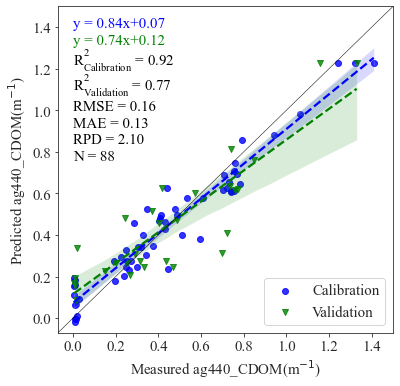

In [12]:
x1 = cal_data_outputs_CDOM
y1 = cal_data_outputs_pred_CDOM
x2 = val_data_outputs_CDOM
y2 = val_data_outputs_pred_CDOM


plt.figure(figsize=(6,6))
sns.set_style("ticks",{"xtick.major.size": 8, "ytick.major.size": 8}) 

sns.regplot(x=cal_data_outputs_CDOM,y=cal_data_outputs_pred_CDOM, marker= 'o',color='blue',scatter=True, fit_reg=True, 
            line_kws={'linestyle':'--','color':'blue'}, 
            label="Calibration",truncate=True,ci=95)
sns.regplot(x=val_data_outputs_CDOM,y=val_data_outputs_pred_CDOM, marker= 'v',color='green',
            line_kws={'linestyle':'--','color':'green'}, 
            label="Validation",truncate=True,ci=95)

plt.xlim((-0.07,1.5))
plt.ylim((-0.07,1.5))
plt.xticks(fontproperties = 'Times New Roman',fontsize = 15)
plt.yticks(fontproperties = 'Times New Roman',fontsize = 15)

z = range(-1,5,1)
plt.plot(z,z,linewidth = 0.5,color = "k")

plt.rcParams['font.sans-serif'] = ['Times New Roman']
plt.rcParams['axes.unicode_minus'] = False
plt.xlabel('Measured ag440_CDOM(m$^{-1}$)',fontsize=15) 
plt.ylabel('Predicted ag440_CDOM(m$^{-1}$)',fontsize=15) 

plt.text(0,1.4,"y = {k}x+{b}".format(k = myCalK_CDOM,b = myCalIntercept_CDOM), fontproperties = 'Times New Roman',size = 15,
         color = "blue",weight = "light") 
plt.text(0,1.32,"y = {k}x+{b}".format(k = myValK_CDOM,b = myValIntercept_CDOM),fontproperties = 'Times New Roman', size = 15,
         color = "green",weight = "light")
plt.text(0,1.22,"$\mathregular{R^2_{Calibration}}$ = %.2f"%myCalR2_CDOM, fontproperties = 'Times New Roman',size = 15,
         color = "k",weight = "light")
plt.text(0,1.10,"R$\mathregular{^2_{Validation}}$ = %.2f"%myValR2_CDOM, fontproperties = 'Times New Roman',size = 15,
         color = "k",weight = "light")
plt.text(0,1.00,"RMSE = %.2f"%myValRMSE_CDOM, fontproperties = 'Times New Roman',size = 15,color = "k",weight = "light")
plt.text(0,0.92,"MAE = %.2f"%myValMAE_CDOM, fontproperties = 'Times New Roman',size = 15,color = "k",weight = "light")
plt.text(0,0.84,"RPD = %.2f"%myValRPD_CDOM,fontproperties = 'Times New Roman', size = 15,color = "k",weight = "light")
plt.text(0,0.76,"N = {lenSamplingPointsNumCDOM}".format(lenSamplingPointsNumCDOM = lenCalSampPointsNumCDOM+lenValSampPointsNumCDOM), 
         fontproperties = 'Times New Roman',size = 15,color = "k",weight = "light")

plt.legend(loc = 4,fontsize = 15)

plt.savefig(os.path.join(dir_write,'CDOM(88Points)XGBoost20240811(lr0.3,n_est50,max_dep6,min_child2,subsample0.75,colsample_bytree0.96,gamma0.03,alpha0.2,lambda2).jpg'),dpi=300,bbox_inches='tight')
plt.show()